In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

In [6]:
city_abbr = ['smr', 'spb']
cols_str = """price_per_m,area,bank_1000,bank_500,bus_stop_1000,bus_stop_500,cafe_1000,cafe_500,cinema_1000,cinema_500,distance_to_bus_stop,distance_to_center,distance_to_school,distance_to_subway,floor,floors_total,government_1000,government_500,hospital_1000,hospital_500,hotel_1000,hotel_500,leisure_1000,leisure_500,mean_salaries_1000,mean_salaries_500,median_salaries_1000,median_salaries_500,nightlife_1000,nightlife_500,office_1000,office_500,point_of_interest_1000,point_of_interest_500,rooms,school_1000,school_500,shop_1000,shop_500,subway_station_1000,subway_station_500,tram_stop_1000,tram_stop_500,univercity_1000,univercity_500,vacancy_1000,vacancy_500"""
columnsTitles = cols_str.split(',')

In [47]:
for abbr in city_abbr:
    df = pd.read_csv(f'./datasets/initial/{abbr}.csv').drop_duplicates()
    df=df.reindex(columns=columnsTitles)
    df.to_csv(f'./datasets/filtered/{abbr}.csv', index=False)

In [7]:
spb_data = pd.read_csv(f'./datasets/filtered/{"spb"}.csv')

In [8]:
x = spb_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
spb_data = pd.DataFrame(x_scaled)
spb_data.columns = columnsTitles

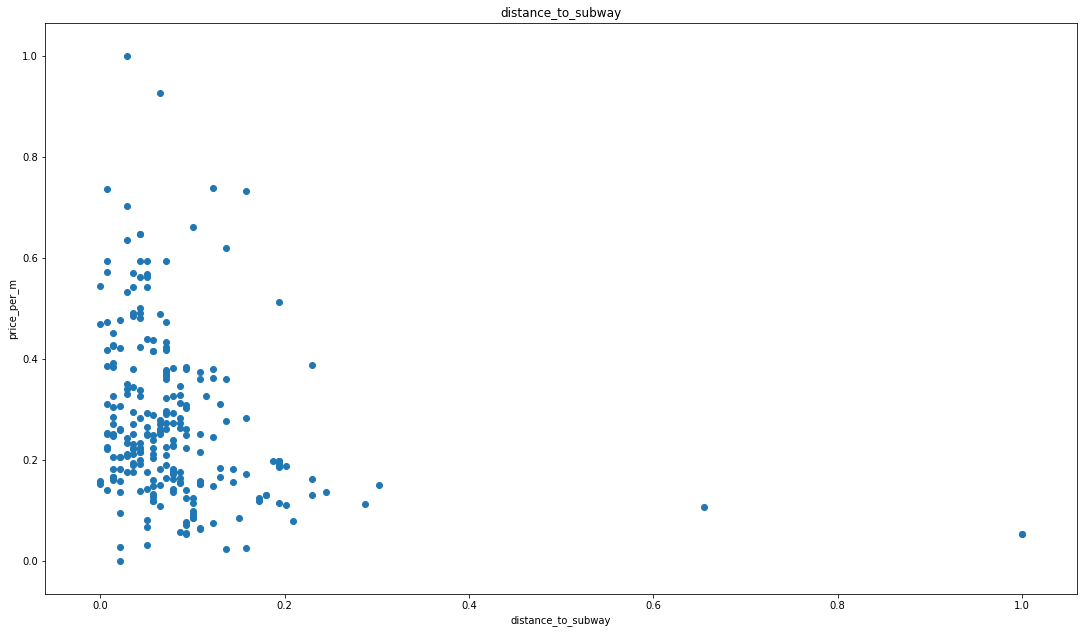

In [24]:
col_name = 'distance_to_subway'

x = spb_data[col_name]
y = spb_data['price_per_m']
fig, ax = plt.subplots()
plt.scatter(x, y, marker='o')
plt.title(col_name)
plt.xlabel(col_name)
plt.ylabel('price_per_m')
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
plt.show()

In [32]:
X = spb_data[['median_salaries_1000', 'area']]
Y = spb_data['price_per_m']

In [33]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(208, 2)
(52, 2)
(208,)
(52,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.1546781692790055
R2 score is 0.18211607260483664


The model performance for testing set
--------------------------------------
RMSE is 0.12136218868764918
R2 score is 0.1942056564941682


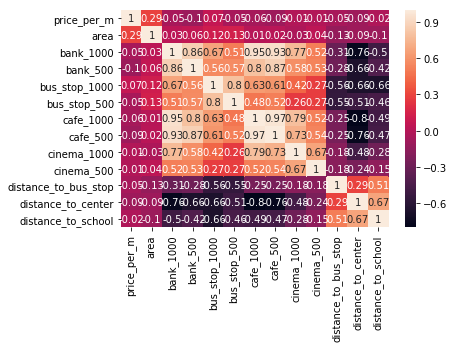

In [24]:

correlation_matrix = spb_data.loc[:, 'price_per_m':'distance_to_school'].corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
.loc[:, 'price_per_m':'distance_to_school']

,price_per_m,area,bank_1000,bank_500,bus_stop_1000,bus_stop_500,cafe_1000,cafe_500,cinema_1000,cinema_500,...,shop_1000,shop_500,subway_station_1000,subway_station_500,tram_stop_1000,tram_stop_500,univercity_1000,univercity_500,vacancy_1000,vacancy_500
0,0.290781,0.325692,0.045455,0.000000,0.487603,0.444444,0.011429,0.005291,0.000000,0.00,...,0.013492,0.005714,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.192308,0.003460
1,0.312682,0.134783,0.121212,0.148148,0.818182,0.622222,0.087619,0.052910,0.000000,0.00,...,0.084127,0.043810,0.000000,0.00,0.541667,0.2,0.727273,0.142857,0.459402,0.467128
2,0.326364,0.207510,0.121212,0.074074,0.512397,0.355556,0.097143,0.058201,0.000000,0.00,...,0.102381,0.043810,0.000000,0.00,0.125000,0.0,0.363636,0.142857,0.076923,0.041522
3,0.208841,0.280632,0.242424,0.037037,0.446281,0.533333,0.209524,0.142857,0.142857,0.00,...,0.142063,0.116190,0.142857,0.25,0.583333,0.6,0.000000,0.000000,0.446581,0.110727
4,0.024418,0.113043,0.484848,0.407407,0.644628,0.577778,0.518095,0.460317,0.142857,0.00,...,0.342857,0.274286,0.428571,0.25,0.000000,0.0,0.090909,0.000000,0.352564,0.169550
5,0.130592,0.000000,0.015152,0.000000,0.487603,0.266667,0.017143,0.010582,0.000000,0.00,...,0.054762,0.034286,0.000000,0.00,0.500000,0.4,0.000000,0.000000,0.064103,0.017301
6,0.076613,0.058893,0.484848,0.407407,0.644628,0.577778,0.518095,0.460317,0.142857,0.00,...,0.342857,0.274286,0.428571,0.25,0.000000,0.0,0.090909,0.000000,0.352564,0.169550
7,0.204061,0.209486,0.287879,0.222222,0.661157,0.511111,0.161905,0.063492,0.142857,0.00,...,0.141270,0.049524,0.000000,0.00,0.500000,0.4,0.090909,0.142857,0.382479,0.145329
8,0.425338,0.114625,0.803030,0.629630,0.801653,0.577778,0.680000,0.693122,0.428571,0.25,...,0.814286,0.655238,0.285714,0.25,0.250000,0.0,0.000000,0.000000,0.728632,0.335640
9,0.359467,0.154150,0.227273,0.000000,0.438017,0.133333,0.110476,0.068783,0.000000,0.00,...,0.069048,0.045714,0.000000,0.00,0.416667,0.0,0.090909,0.142857,0.429487,0.179931


In [26]:
def plot_hists(feature):
    pyplot.hist(spb_dataset[feature], density=True, bins=15)
    pyplot.hist(smr_dataset[feature], density=True, bins=15, color=(1, 1, 0, 0.5))

In [ ]:
spb_dataset.filter()

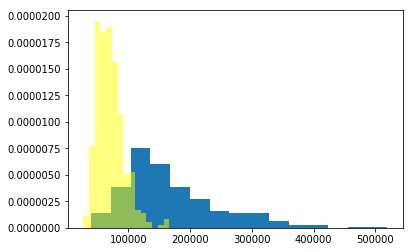

In [40]:
plot_hists('price_per_m')

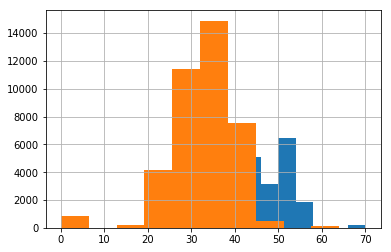

In [14]:
spb_dataset.median_salaries_1000.hist()
smr_dataset.median_salaries_1000.hist()

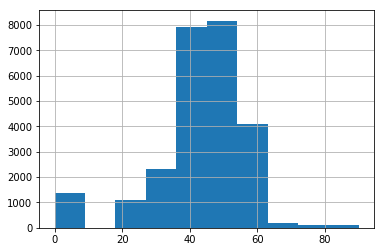

In [8]:
spb_dataset.median_salaries_500.hist()

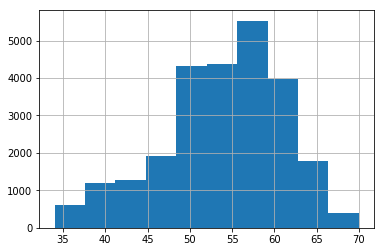

In [9]:
spb_dataset.mean_salaries_1000.hist()

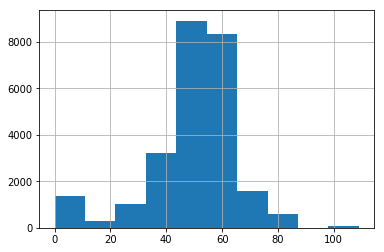

In [10]:
spb_dataset.mean_salaries_500.hist()